### Import necessary modules and set graphing defaults

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Set Matplotlib default text sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE, labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

### - Import and prepare data

In [187]:
# Import Boston housing dataset and transform into pandas df
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    return df
df_boston = sklearn_to_df(load_boston())
df_boston.rename(columns={"target": "MEDV"}, inplace=True)

# Filter dataset for prettier graph (yes this is cheating)
df_boston = df_boston[df_boston['MEDV'] < 50]
df_boston = df_boston[df_boston['RM'] > 4.5]

# Sepearate the dataset with a 50 / 50 split
np.random.seed(1)
msk = np.random.rand(len(df_boston)) < 0.5
df_boston_train = df_boston[msk]
df_boston_test = df_boston[~msk]

# Full dataset for naive approach
X_full = df_boston[['RM']]
X_seq_full = np.linspace(X_full.min(),X_full.max(),300).reshape(-1,1)
y_full = df_boston[['MEDV']]*1000

# Train dataset for training
X_train = df_boston_train[['RM']]
X_seq_train = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
y_train = df_boston_train[['MEDV']]*1000

# Test dataset for testing the trained model
X_test = df_boston_test[['RM']]
X_seq_test = np.linspace(X_test.min(),X_test.max(),300).reshape(-1,1)
y_test = df_boston_test[['MEDV']]*1000

### Overfitting: A Story Based Explanation

Your boss walks up to you on Monday morning and says "Hey I just received a new dataset. It details median Bouston house prices and the average number of rooms. Won't you be a good sport and create a linear regression model to predict house prices based on the number of rooms?"

You respond "Sure sounds great!" Your boss walks off and you bring in the data and experiment first with simple linear regression (y=mx+b) and you receive an R^2 value of 0.6 then you experiment with polynomial regression (y=mx^2+bx+c) and you receive an R^2 value of 0.7. As you keep bumping up the polynomial degree (X^2 -> degree is 2), your R^2 improves like magic (**See Figure 1**). You proudly type out your polynomial regression equation, y = aX^6 + bx^5 ... + c and email it to your boss. With your end of the year review around the corner you are feeling pretttty good. 

Your boss goes on to use the equation to predict house prices in new neighborhoods. After consultation with a local realtor, your boss realizes that your predictions are +- 50K off of reality. He comes storming to your cube and demands an answer. You don't know how to answer him... Until you read through this notebook!

The error was in overfitting. Overfitting happens when you create a model that captures too much variation in the dataset. If you have an extremely complex model that accounts for all outliers it will perform poorly on new data without those same outliers. This happened in the example above. An extremely complex polynomial line was fit to the original data. When applied to new data it performed poorly. See **Figure 2** below. For instance, if your boss was researching homes with 9-10 rooms then your model will substantially undervalue the homes.

So what is the solution? Typically, data scientist break their dataset up into a training data set and a testing dataset.

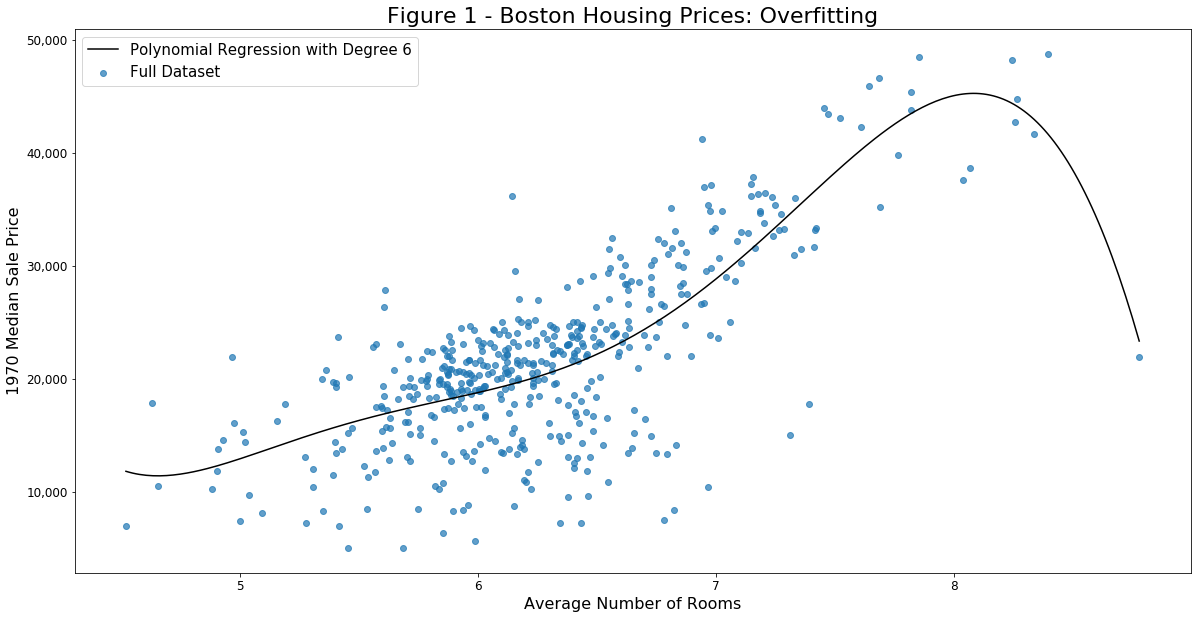

In [199]:
# Create polynomial regression using Scikit Learn
# https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2

# Naive Approach
degree=6
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_full,y_full)

fig, ax = plt.subplots(figsize=(20,10))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.scatter(X_full,y_full, label="Full Dataset", alpha=0.7)
plt.plot(X_seq,polyreg.predict(X_seq_train),color="black", label="Polynomial Regression with Degree "+str(degree))
plt.xlabel('Average Number of Rooms')
plt.ylabel('1970 Median Sale Price')
plt.title("Figure 1 - Boston Housing Prices: Overfitting") 
plt.legend(loc=2, prop={'size': 15})
plt.show()

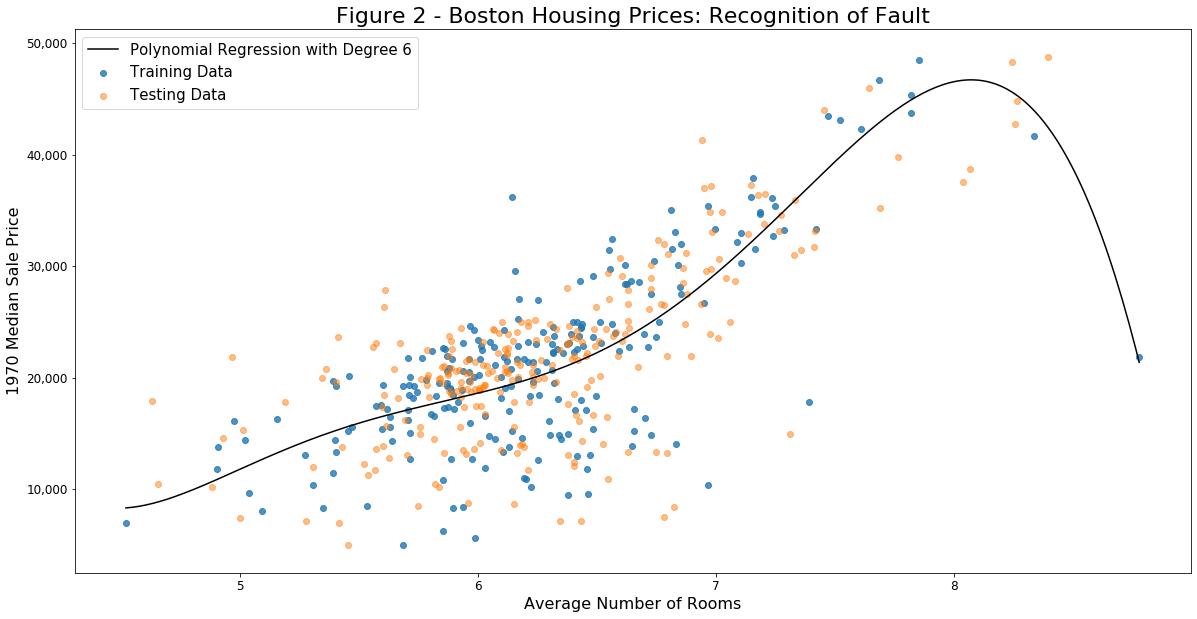

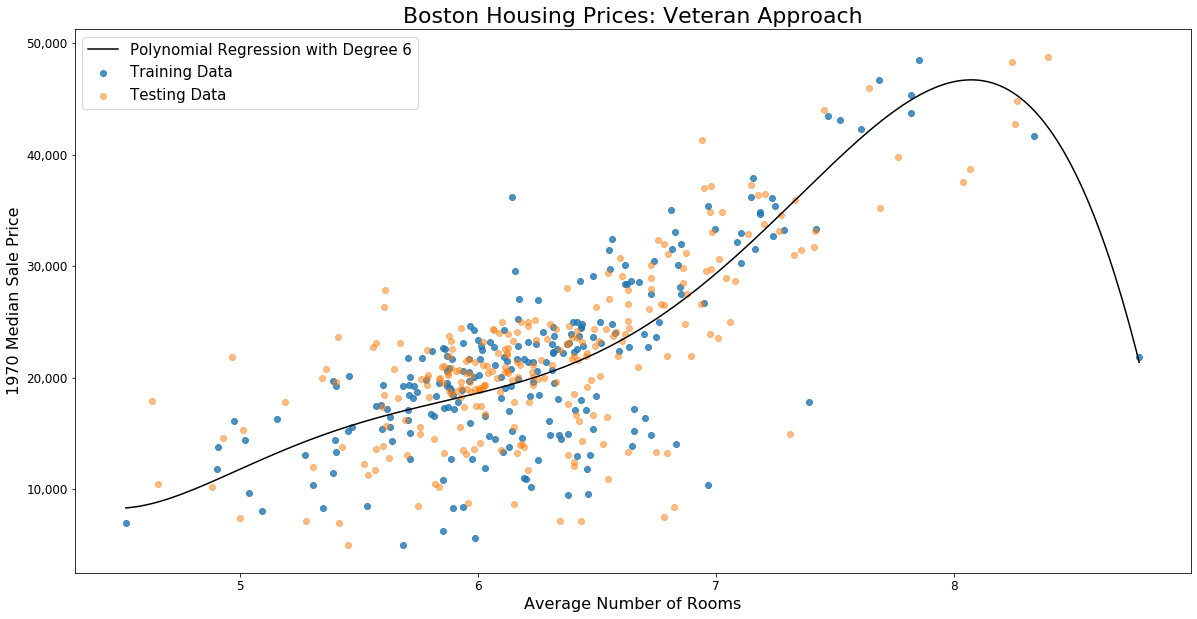

In [200]:
# Refined Approach
degree=6
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(20,10))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.scatter(X_train,y_train, label="Training Data", alpha=0.8)
plt.scatter(X_test,y_test, label="Testing Data", alpha=0.5)
plt.plot(X_seq,polyreg.predict(X_seq_train),color="black", label="Polynomial Regression with Degree "+str(degree))
plt.xlabel('Average Number of Rooms')
plt.ylabel('1970 Median Sale Price')
plt.title("Figure 2 - Boston Housing Prices: Recognition of Fault") 
plt.legend(loc=2, prop={'size': 15})
plt.show()

# Most Refined Approach
degree=6
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(20,10))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.scatter(X_train,y_train, label="Training Data", alpha=0.8)
plt.scatter(X_test,y_test, label="Testing Data", alpha=0.5)
plt.plot(X_seq,polyreg.predict(X_seq_train),color="black", label="Polynomial Regression with Degree "+str(degree))
plt.xlabel('Average Number of Rooms')
plt.ylabel('1970 Median Sale Price')
plt.title("Boston Housing Prices: Veteran Approach") 
plt.legend(loc=2, prop={'size': 15})
plt.show()

In [21]:
ols = linear_model.LinearRegression()

In [89]:
x = df_boston[['RM']]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

In [90]:
x_poly

array([[ 1.      ,  6.575   , 43.230625],
       [ 1.      ,  6.421   , 41.229241],
       [ 1.      ,  7.185   , 51.624225],
       ...,
       [ 1.      ,  6.976   , 48.664576],
       [ 1.      ,  6.794   , 46.158436],
       [ 1.      ,  6.03    , 36.3609  ]])

In [91]:
x = df_boston[['RM']]
y = df_boston[['MEDV']]

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

In [92]:
x

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


5.349421853204455
0.5357044387266706


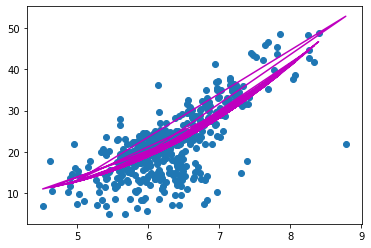

In [93]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y) #, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [56]:
x = 2 - 3 * np.random.normal(0, 1, 20)
x

array([-1.87441384,  1.90231651,  1.93247579, -3.09399144,  0.80272657,
        3.67819625, -2.13037726,  2.75357435,  4.15061511,  6.09545123,
        5.9583908 ,  3.5561624 ,  0.76905024,  3.84979938,  2.30729452,
        5.03691347,  6.13923088,  2.60426183, -1.23360528,  2.93478831])

In [57]:
x = x[:, np.newaxis]
x

array([[-1.87441384],
       [ 1.90231651],
       [ 1.93247579],
       [-3.09399144],
       [ 0.80272657],
       [ 3.67819625],
       [-2.13037726],
       [ 2.75357435],
       [ 4.15061511],
       [ 6.09545123],
       [ 5.9583908 ],
       [ 3.5561624 ],
       [ 0.76905024],
       [ 3.84979938],
       [ 2.30729452],
       [ 5.03691347],
       [ 6.13923088],
       [ 2.60426183],
       [-1.23360528],
       [ 2.93478831]])